# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
# print(flight.head())

## Task 1
average_coach_price = np.mean(flight['coach_price'])
highest_coach_price = np.max(flight['coach_price'])
lowest_coach_price = np.min(flight['coach_price'])
print('Lowest Price:' + str(lowest_coach_price) + ', Highest Price:' + str(highest_coach_price) + ', Average Price:' + str(average_coach_price))

Lowest Price:44.415, Highest Price:593.635, Average Price:376.5852530821279


**$500 is on the higher end for a ticket, so for price itself it is not worth it, but depending on other variables (distance, entertainment, etc.) it may or may not be worth it** 

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

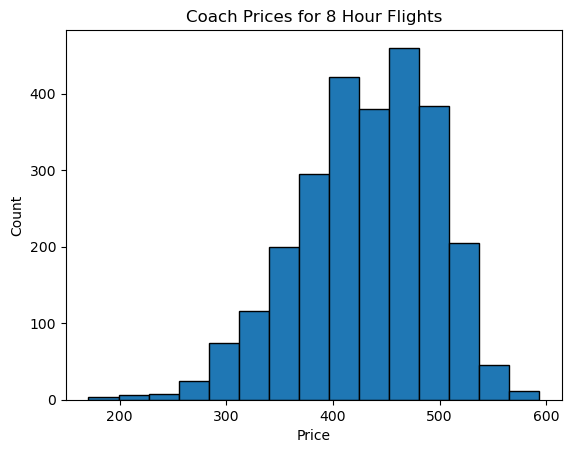

<Figure size 640x480 with 0 Axes>

In [27]:
## Task 2
plt.hist(x=flight.coach_price[flight.hours == 8], bins = 15, edgecolor = 'black')
plt.title('Coach Prices for 8 Hour Flights')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()
plt.clf()

**A $500 ticket is much more reasonable than before because as we can see in the histogram, the data is skewed-left**

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

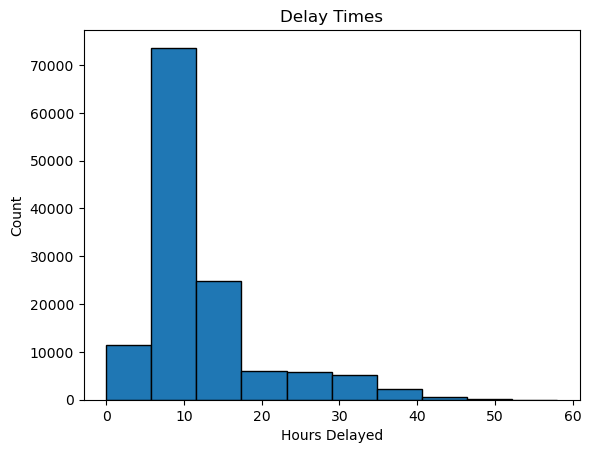

<Figure size 640x480 with 0 Axes>

In [26]:
## Task 3

plt.hist(x=flight.delay[flight.delay <= 300], edgecolor = 'black')
plt.title('Delay Times')
plt.xlabel('Hours Delayed')
plt.ylabel('Count')
plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

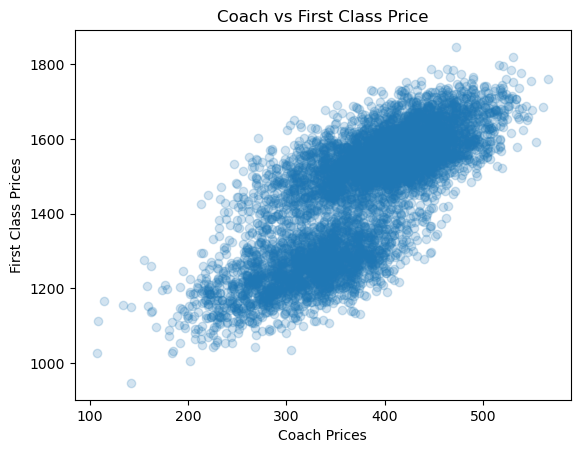

<Figure size 640x480 with 0 Axes>

In [30]:
## Task 4

# Make a sample of the data to make the scatter plot smaller and easier to view
sample_of_flight = flight.sample(n=int(len(flight)*.05))

# Make a Scatter Plot
plt.scatter(sample_of_flight.coach_price, sample_of_flight.firstclass_price, alpha = .2)
plt.title('Coach vs First Class Price')
plt.xlabel('Coach Prices')
plt.ylabel('First Class Prices')
plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

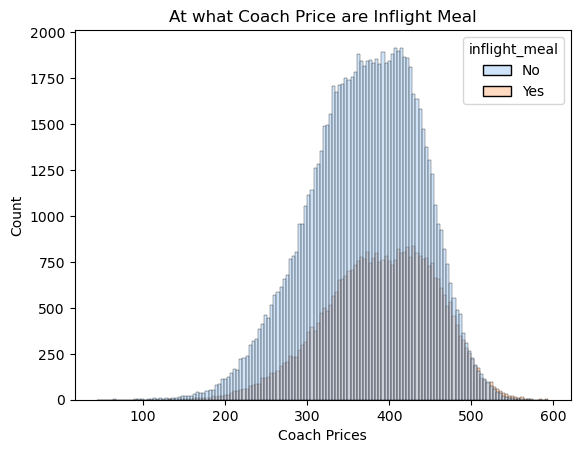

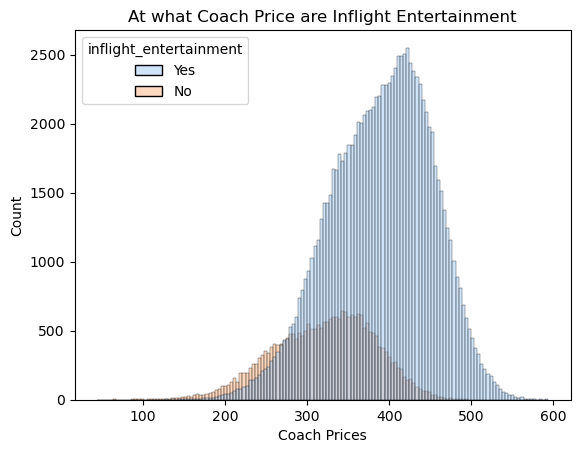

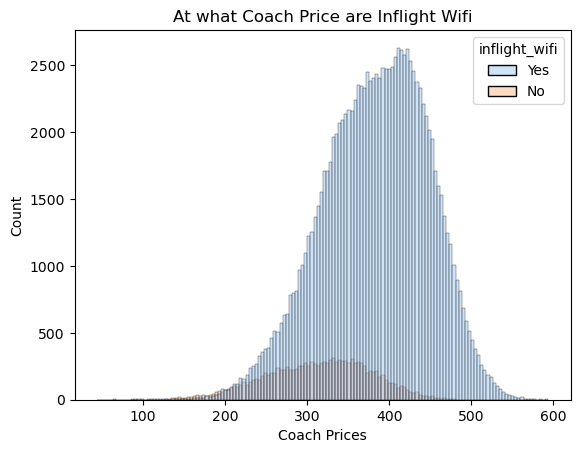

<Figure size 640x480 with 0 Axes>

In [37]:
## Task 5

# Set the desired color palette
color_palette = 'pastel'

#Inflight meal
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal, palette = color_palette)
plt.title('At what Coach Price are Inflight Meal')
plt.xlabel('Coach Prices')
plt.ylabel('Count')
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment, palette = color_palette)
plt.title('At what Coach Price are Inflight Entertainment')
plt.xlabel('Coach Prices')
plt.ylabel('Count')
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi, palette = color_palette)
plt.title('At what Coach Price are Inflight Wifi')
plt.xlabel('Coach Prices')
plt.ylabel('Count')
plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

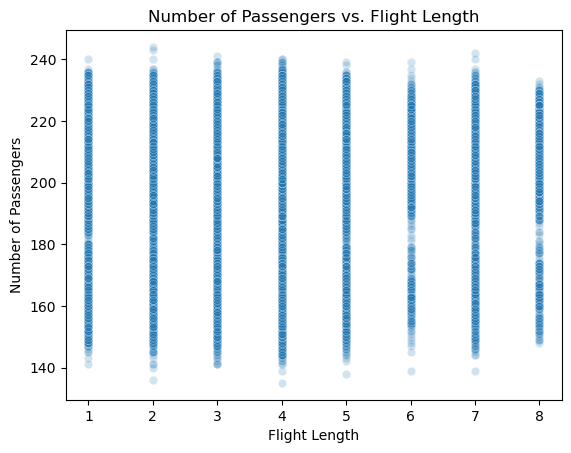

<Figure size 640x480 with 0 Axes>

In [51]:
## Task 6

sns.scatterplot(x = "hours", y = "passengers", data = flight, alpha = .2, x_jitter = 0.25)
plt.xlabel('Flight Length')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers vs. Flight Length')
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

In [64]:
## Task 7

# Determine if weekend
is_weekend = []
for day in flight.day_of_week:
    if day == 'Saturday' or day == 'Sunday':
        is_weekend.append(True)
    else:
        is_weekend.append(False)

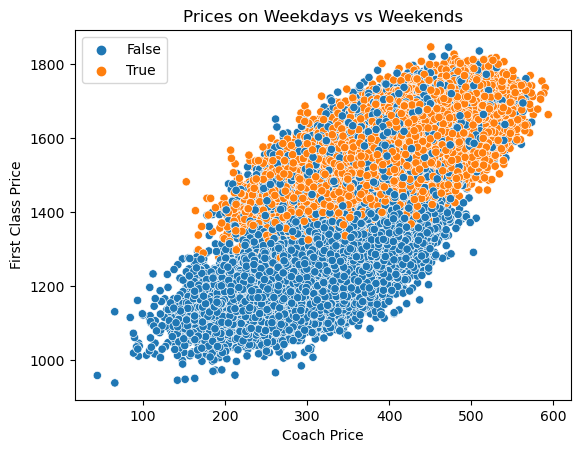

<Figure size 640x480 with 0 Axes>

In [71]:
sns.scatterplot(x = 'coach_price', y = 'firstclass_price', data = flight, hue = is_weekend)
plt.title('Prices on Weekdays vs Weekends')
plt.xlabel('Coach Price')
plt.ylabel('First Class Price')
plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

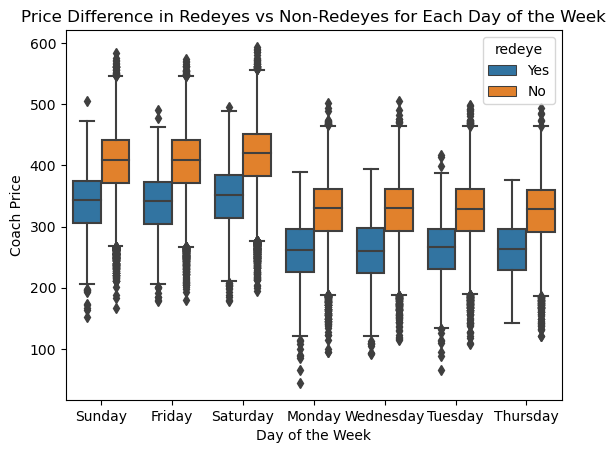

<Figure size 640x480 with 0 Axes>

In [73]:
## Task 8
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.title('Price Difference in Redeyes vs Non-Redeyes for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Coach Price')
plt.show()
plt.clf()